Importing the required libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import cv2
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)
import pandas as pd
from keras.datasets import mnist

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
cd /content/gdrive/MyDrive/42028/Assignment1/

/content/gdrive/MyDrive/42028/Assignment1


Uploading and storing the Data

In [6]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz'% kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), 
                            dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

X_train, y_train = load_mnist('/content/gdrive/My Drive/42028/Assignment1',
                              kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/42028/Assignment1', 
                            kind='t10k')

Data set Basic information

Train Data Shape (60000, 784) Type-> <class 'numpy.ndarray'>
Train Labels Shape   (60000,) Type-> <class 'numpy.ndarray'>
Test Data Shape (10000, 784) Type-> <class 'numpy.ndarray'>
Test Labels Shape   (10000,) Type-> <class 'numpy.ndarray'>


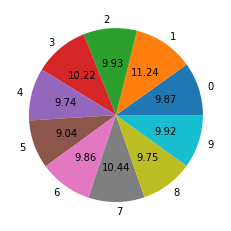

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


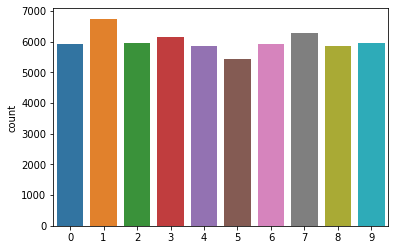

In [7]:
def shape_type(X,y,type_data):
  print(type_data,"Data Shape",X.shape,"Type->",type (X))
  print(type_data,"Labels Shape  ",y.shape,"Type->",type (y))

shape_type(X_train,y_train,"Train")
shape_type(X_test,y_test,"Test")
import numpy as np
(unique, frequency)=np.unique(y_train,return_counts=True)
plt.pie(frequency,labels=unique,autopct='%.2f')
plt.show()
sns.countplot(y_train)
plt.show()

Normalizing the Data  for raw input

In [8]:
X_train_normal=np.round( X_train/255.0,3)
X_test_normal=np.round( X_test/255.0,3) 

SVM with normalized data- fitting, predicting, accuracy- 

    Best setting found by experimenting(result provided in report) are C=1, kernel- rbf

In [9]:
from sklearn import svm
model_svm= svm.SVC(C=1, kernel="rbf", random_state=0)
model_svm.fit(X_train_normal,y_train)
prediction= model_svm.predict( X_test_normal)
accuracy= metrics.accuracy_score(y_test, prediction)
print("Accuracy of SVM using normalized Raw data is-",accuracy)

Accuracy of SVM using normalized Raw data is- 0.9792


Confusion MAtrix for SVM using normalized raw data with kernel rbf

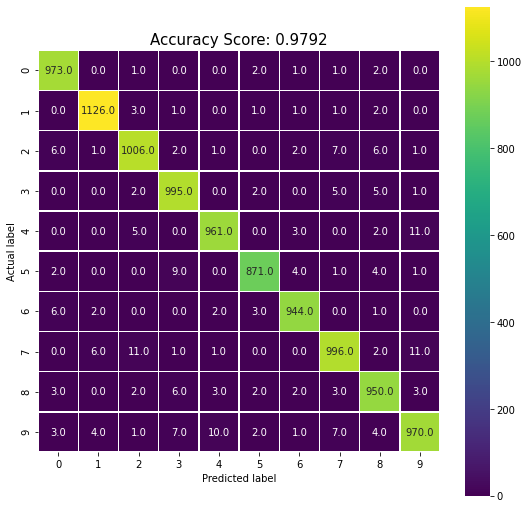

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix( y_test, prediction)
plt.figure( figsize=(9,9))
sns.heatmap(cm, annot=True,fmt=".1f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy )
plt.title(all_sample_title, size = 15);

Calculating the HOG features of the training and testing (pixel per cell=[2,2] cells per block=[2,2]

In [11]:
from skimage.feature import hog
def return_hog_features(X):
  """Input an array of  images
     returns a numpy array which stores hog features of each image"""
  X = np.array(X, dtype ="int16")
  list_hog = []
  for feature in X:
    fd = hog(feature.reshape((28,28)), orientations=8, pixels_per_cell=(2,2),cells_per_block=(2,2) )
    list_hog.append(fd)
  hog_features = np.array(list_hog, "float64")
  return hog_features
train_hog_features= return_hog_features(X_train)
test_hog_features= return_hog_features(X_test)

SVM fitting and predicting on HOG features

    Best setting found by experimenting(result provided in report) are C=1, kernel-poly

In [12]:
model_svm_hog= svm.SVC(C=1, kernel="poly", random_state=0)
model_svm_hog.fit(train_hog_features,y_train)
predict_svm_hog= model_svm_hog.predict(test_hog_features)
accuracy_hog = metrics.accuracy_score(y_test, predict_svm_hog)
print("Accuracy on test dataset:",accuracy_hog)

Accuracy on test dataset: 0.9888


Confusion Matrix- SVM hog

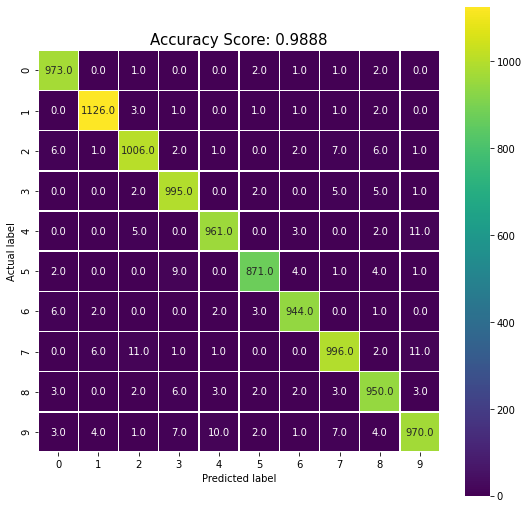

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_hog=confusion_matrix( y_test, predict_svm_hog)
plt.figure( figsize=(9,9))
sns.heatmap(cm, annot=True,fmt=".1f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_hog)
plt.title(all_sample_title, size = 15);

**Experimenting**

Classification Report

In [14]:
print(f"Classification report for classifier { model_svm_hog}:\n"
      f"{metrics.classification_report(y_test, predict_svm_hog)}\n")

Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg

Finding images in which both the model are predicting wrong with the same value

0 -> 3
1 -> 3
2 -> 7
3 -> 7
4 -> 5
5 -> 4
6 -> 5
7 -> 9
8 -> 7
9 -> 15
	Real: 2
	Predicted 7


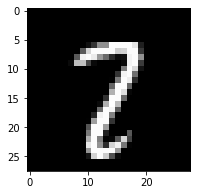

	Real: 8
	Predicted 2


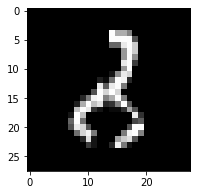

	Real: 0
	Predicted 6


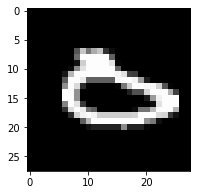

	Real: 4
	Predicted 9


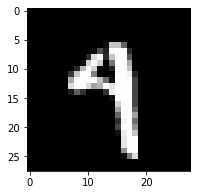

	Real: 8
	Predicted 9


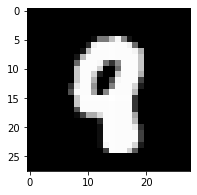

	Real: 6
	Predicted 5


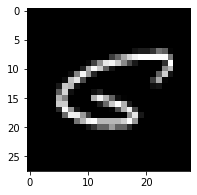

	Real: 7
	Predicted 2


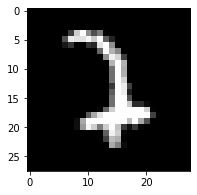

	Real: 9
	Predicted 4


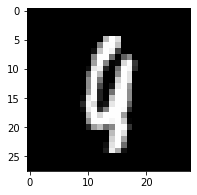

	Real: 7
	Predicted 1


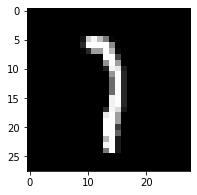

	Real: 5
	Predicted 7


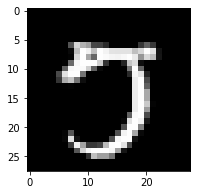

	Real: 8
	Predicted 3


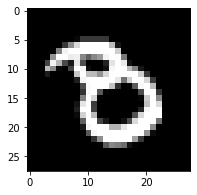

	Real: 7
	Predicted 9


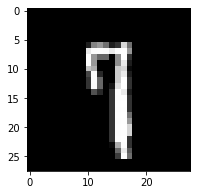

	Real: 8
	Predicted 7


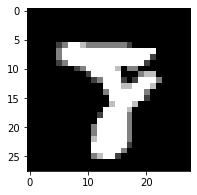

	Real: 3
	Predicted 7


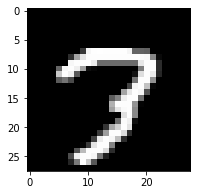

	Real: 9
	Predicted 3


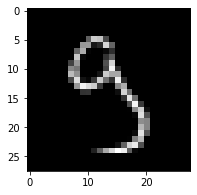

	Real: 9
	Predicted 4


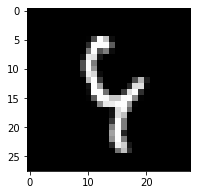

	Real: 5
	Predicted 3


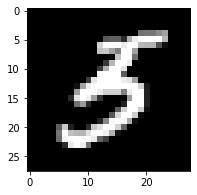

	Real: 3
	Predicted 7


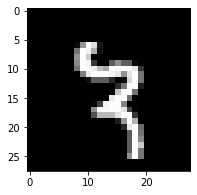

	Real: 9
	Predicted 2


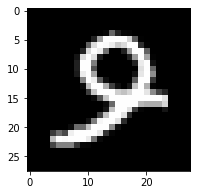

	Real: 4
	Predicted 9


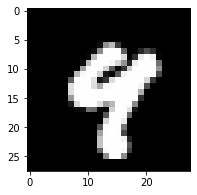

	Real: 6
	Predicted 1


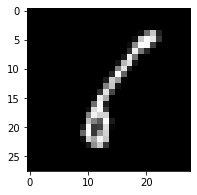

	Real: 1
	Predicted 2


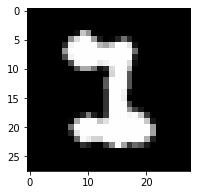

	Real: 9
	Predicted 1


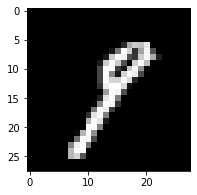

	Real: 9
	Predicted 1


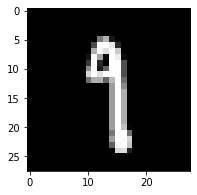

	Real: 9
	Predicted 4


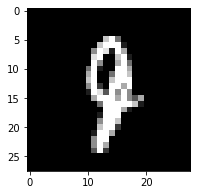

	Real: 2
	Predicted 0


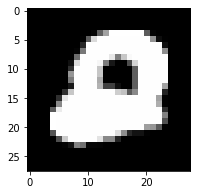

	Real: 5
	Predicted 3


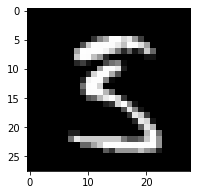

	Real: 6
	Predicted 1


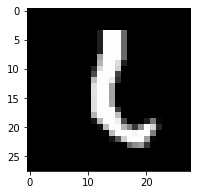

	Real: 8
	Predicted 0


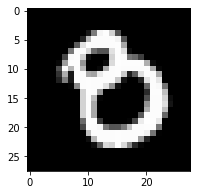

	Real: 3
	Predicted 2


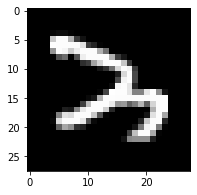

	Real: 9
	Predicted 5


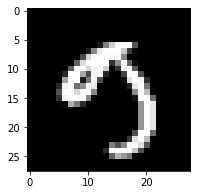

	Real: 3
	Predicted 5


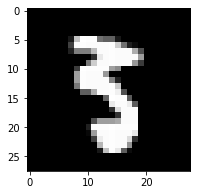

	Real: 9
	Predicted 7


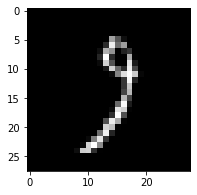

	Real: 1
	Predicted 2


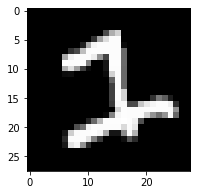

	Real: 7
	Predicted 9


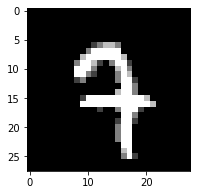

	Real: 2
	Predicted 6


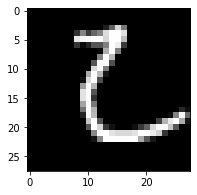

	Real: 6
	Predicted 0


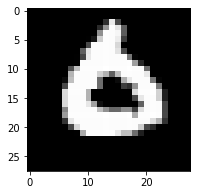

	Real: 9
	Predicted 1


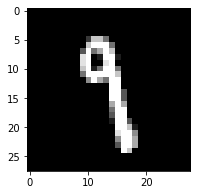

	Real: 6
	Predicted 4


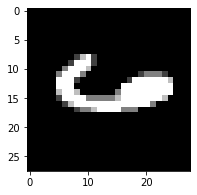

	Real: 9
	Predicted 3


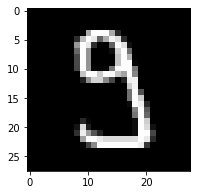

	Real: 2
	Predicted 8


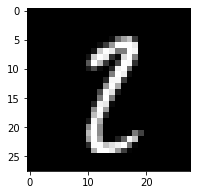

	Real: 7
	Predicted 8


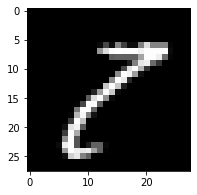

	Real: 0
	Predicted 2


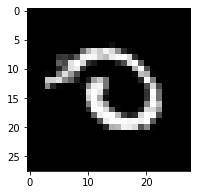

	Real: 2
	Predicted 7


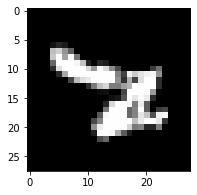

	Real: 9
	Predicted 7


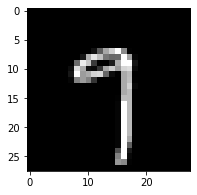

	Real: 8
	Predicted 7


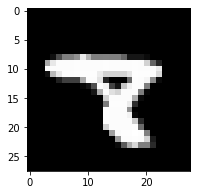

	Real: 9
	Predicted 1


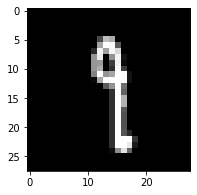

	Real: 8
	Predicted 9


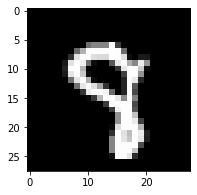

	Real: 3
	Predicted 5


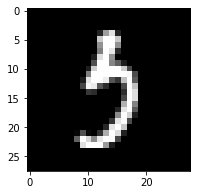

	Real: 9
	Predicted 4


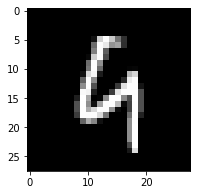

	Real: 7
	Predicted 1


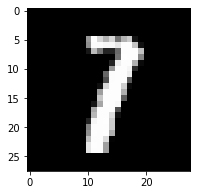

	Real: 1
	Predicted 6


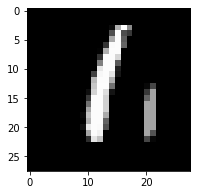

	Real: 4
	Predicted 9


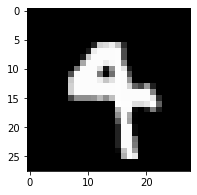

	Real: 3
	Predicted 8


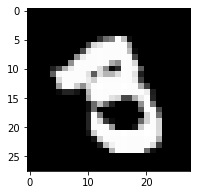

	Real: 3
	Predicted 8


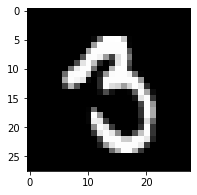

	Real: 9
	Predicted 3


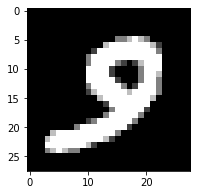

	Real: 7
	Predicted 1


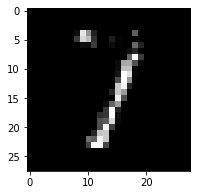

	Real: 0
	Predicted 7


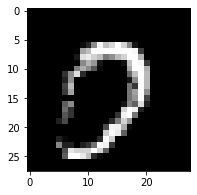

	Real: 4
	Predicted 8


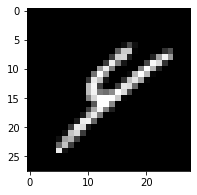

	Real: 4
	Predicted 9


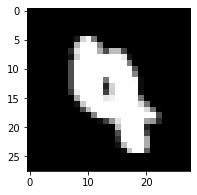

	Real: 7
	Predicted 2


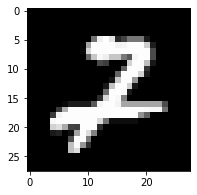

	Real: 7
	Predicted 2


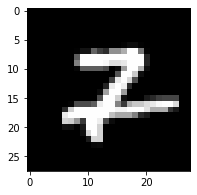

	Real: 2
	Predicted 7


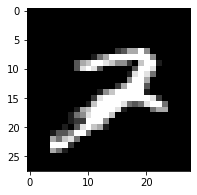

	Real: 5
	Predicted 6


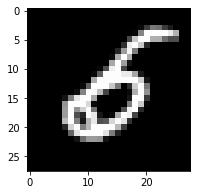

	Real: 2
	Predicted 7


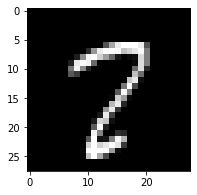

In [15]:
error_both=[]
for i in range(len(y_test)):
  if (y_test[i]== predict_svm_hog[i]):
    continue
  if (predict_svm_hog[i]==prediction[i]):
    error_both.append(i)

(unique, frequence)= np.unique( y_test[error_both],return_counts=True)
for i in range(len(unique)):
  print(unique[i],"->",frequence[i])

for i in error_both:
  print("\tReal:",y_test[i])
  print("\tPredicted",predict_svm_hog[i])
  plt.figure(figsize=(3,3))
  plt.imshow(np.reshape(X_test[i],[28,28]),cmap="gray")
  plt.show()

Number of Support vectors vs error for each label for both HOG and normalized raw data

Label	 SV	Values	Ratio	error
0 -	 751 -	 5923 	 0.13 	 0.714
1 -	 558 -	 6742 	 0.08 	 0.793
2 -	 1347 -	 5958 	 0.23 	 2.519
3 -	 1448 -	 6131 	 0.24 	 1.485
4 -	 1263 -	 5842 	 0.22 	 2.138
5 -	 1548 -	 5421 	 0.29 	 2.354
6 -	 926 -	 5918 	 0.16 	 1.461
7 -	 1149 -	 6265 	 0.18 	 3.113
8 -	 1667 -	 5851 	 0.28 	 2.464
9 -	 1678 -	 5949 	 0.28 	 3.865


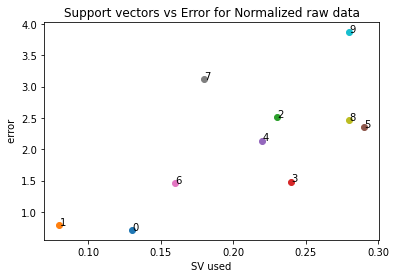

Label	 SV	Values	Ratio	error
0 -	 1000 -	 5923 	 0.17 	 0.714
1 -	 1013 -	 6742 	 0.15 	 0.352
2 -	 1919 -	 5958 	 0.32 	 1.066
3 -	 1903 -	 6131 	 0.31 	 1.089
4 -	 1853 -	 5842 	 0.32 	 0.916
5 -	 1836 -	 5421 	 0.34 	 0.673
6 -	 1287 -	 5918 	 0.22 	 1.148
7 -	 1736 -	 6265 	 0.28 	 1.459
8 -	 2104 -	 5851 	 0.36 	 1.437
9 -	 1843 -	 5949 	 0.31 	 2.379


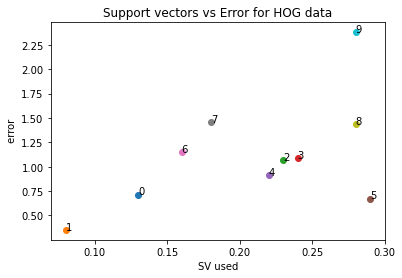

In [16]:
import pandas as pd
y=pd.DataFrame(y_train)
z=model_svm.n_support_
error=[]
total=[]
for i in range(10):
  sum=0
  total.append(np.sum(cm[i]))
  for j in range(10):
    if (i==j):
      continue
    else:
      sum+=cm[i][j]
  error.append(sum)
#  print(np.round(error[i]/total[i]*100,3))
print("Label\t SV\tValues\tRatio\terror")
fig, ax = plt.subplots()
for i in range(10):
  print(i,"-\t",z[i],"-\t",int (y[y==i].value_counts()),"\t",np.round(float(z[i]/int (y[y==i].value_counts()) ),2),"\t",np.round(error[i]/total[i]*100,3))
  ax.scatter(np.round(float(z[i]/int (y[y==i].value_counts()) ),2),np.round(error[i]/total[i]*100,3))
  ax.annotate(str (i),(np.round(float(z[i]/int (y[y==i].value_counts()) ),2),np.round(error[i]/total[i]*100,3)))
plt.ylabel(" error")
plt.xlabel("SV used")
plt.title("Support vectors vs Error for Normalized raw data")
plt.show()
#Number of Support vectors vs error for each label
import pandas as pd
y=pd.DataFrame(y_train)
sv=model_svm_hog.n_support_  #Storing number of support vectors for each label
error=[]
total=[]
for i in range(10):
  error_i=0
  total.append(np.sum(cm_hog[i])) #count of a particular label
  for j in range(10):
    if (i==j):
      continue
    else:
      error_i+=cm_hog[i][j] #Calculating error of that particular label
  error.append(error_i)
#  print(np.round(error[i]/total[i]*100,3))
print("Label\t SV\tValues\tRatio\terror")
fig, ax = plt.subplots()
for i in range(10):
  print(i,"-\t",sv[i],"-\t",int (y[y==i].value_counts()),"\t",np.round(float(sv[i]/int (y[y==i].value_counts()) ),2),"\t",np.round(error[i]/total[i]*100,3))
  ax.scatter(np.round(float(z[i]/int (y[y==i].value_counts()) ),2),np.round(error[i]/total[i]*100,3))
  ax.annotate(str (i),(np.round(float(z[i]/int (y[y==i].value_counts()) ),2),np.round(error[i]/total[i]*100,3)))
plt.ylabel(" error")
plt.xlabel("SV used")
plt.title("Support vectors vs Error for HOG data")
plt.show()

Importing excel file of list of error for further analysis

#Import the error in excel

def build_error_csv(prediction,name):
  df= pd.DataFrame()
  error=[]  
  for i in range(len(prediction)):
    if (prediction[i]==y_test[i]):
      error.append(0)
    else:
      error.append(1)
  df[name]=error
  name=name+".csv"
  df.to_csv(name ,index=False)


build_error_csv(prediction ,"SVM-Normalized")
build_error_csv(predict_svm_hog,"SVM-HOG")

Following is generated from excel which depicts the error% of each digit

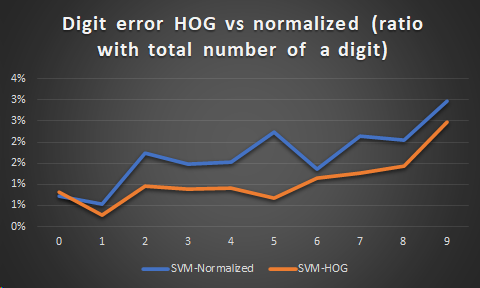

In [1]:
print("End of the Notebook!\nHope you enjoyed!")

End of the Notebook!
Hope you enjoyed!
